In [132]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import datetime

In [4]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Loading Data and Basic checks

In [5]:
data_folder = "data"

#### YTD Data

In [6]:
data_ytd = pd.read_csv(os.path.join(data_folder, "NYPD_Calls_for_Service__Year_to_Date__20240905.csv"))

In [7]:
data_ytd.shape

(3644715, 18)

In [8]:
data_ytd.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644715 entries, 0 to 3644714
Data columns (total 18 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CAD_EVNT_ID    int64  
 1   CREATE_DATE    object 
 2   INCIDENT_DATE  object 
 3   INCIDENT_TIME  object 
 4   NYPD_PCT_CD    float64
 5   BORO_NM        object 
 6   PATRL_BORO_NM  object 
 7   GEO_CD_X       int64  
 8   GEO_CD_Y       int64  
 9   RADIO_CODE     object 
 10  TYP_DESC       object 
 11  CIP_JOBS       object 
 12  ADD_TS         object 
 13  DISP_TS        object 
 14  ARRIVD_TS      object 
 15  CLOSNG_TS      object 
 16  Latitude       float64
 17  Longitude      float64
dtypes: float64(3), int64(3), object(12)
memory usage: 500.5+ MB


#### Historic Data

In [9]:
list_of_historic_files = glob.glob(os.path.join(data_folder,"*Historic*"))
print(list_of_historic_files)

['data\\NYPD_Calls_for_Service__Historic__2019_01_to_2019_12.csv', 'data\\NYPD_Calls_for_Service__Historic__2020_01_to_2020_12.csv', 'data\\NYPD_Calls_for_Service__Historic__2021_01_to_2021_12.csv', 'data\\NYPD_Calls_for_Service__Historic__2022_01_to_2022_12.csv', 'data\\NYPD_Calls_for_Service__Historic__2023_01_to_2023_12.csv']


In [10]:
historic_data = pd.concat([pd.read_csv(file) for file in list_of_historic_files])

C:\Users\aswin\AppData\Local\Temp\ipykernel_20888\4001196054.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  historic_data = pd.concat([pd.read_csv(file) for file in list_of_historic_files])
C:\Users\aswin\AppData\Local\Temp\ipykernel_20888\4001196054.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  historic_data = pd.concat([pd.read_csv(file) for file in list_of_historic_files])


In [11]:
historic_data.shape

(34292114, 20)

In [12]:
historic_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 34292114 entries, 0 to 7050126
Data columns (total 20 columns):
 #   Column         Dtype  
---  ------         -----  
 0   OBJECTID       float64
 1   CAD_EVNT_ID    int64  
 2   CREATE_DATE    object 
 3   INCIDENT_DATE  object 
 4   INCIDENT_TIME  object 
 5   NYPD_PCT_CD    float64
 6   BORO_NM        object 
 7   PATRL_BORO_NM  object 
 8   GEO_CD_X       int64  
 9   GEO_CD_Y       int64  
 10  RADIO_CODE     object 
 11  TYP_DESC       object 
 12  CIP_JOBS       object 
 13  ADD_TS         object 
 14  DISP_TS        object 
 15  ARRIVD_TS      object 
 16  CLOSNG_TS      object 
 17  Latitude       float64
 18  Longitude      float64
 19  Location       object 
dtypes: float64(4), int64(3), object(13)
memory usage: 5.4+ GB


In [13]:
historic_data[["Latitude", "Longitude", "Location"]].head()

,Latitude,Longitude,Location
0,40.687308,-73.950956,POINT (-73.95095580999998 40.687307806000035)
1,40.621604,-73.960716,POINT (-73.96071566199998 40.62160421100003)
2,40.633945,-73.919700,POINT (-73.91970037399994 40.63394542000003)
3,40.633973,-73.948275,POINT (-73.94827482599999 40.63397280400005)
4,40.695284,-73.769594,POINT (-73.76959400199996 40.695283510000024)


### Null Value checking

#### YTD Data

In [14]:
data_ytd.isnull().sum().sum()

738677

In [15]:
ytd_missing_value_report = data_ytd.isnull().sum().sort_values(ascending = False).reset_index()
ytd_missing_value_report.columns = ['Column', 'Null Values Count']
ytd_missing_value_report['Null Values Percentage'] = 100*round(ytd_missing_value_report["Null Values Count"]/len(data_ytd),4)

In [16]:
ytd_missing_value_report

,Column,Null Values Count,Null Values Percentage
0,ARRIVD_TS,738668,20.27
1,CLOSNG_TS,8,0.00
2,NYPD_PCT_CD,1,0.00
3,CAD_EVNT_ID,0,0.00
4,TYP_DESC,0,0.00
5,Latitude,0,0.00
6,DISP_TS,0,0.00
7,ADD_TS,0,0.00
8,CIP_JOBS,0,0.00
9,RADIO_CODE,0,0.00


#### Historic Data

In [17]:
historic_data.isnull().sum().sum()

40899454

In [18]:
historic_data_missing_value_report = historic_data.isnull().sum().sort_values(ascending = False).reset_index()
historic_data_missing_value_report.columns = ['Column', 'Null Values Count']
historic_data_missing_value_report['Null Values Percentage'] = 100*round(historic_data_missing_value_report["Null Values Count"]/len(historic_data),4)

In [19]:
historic_data_missing_value_report

,Column,Null Values Count,Null Values Percentage
0,OBJECTID,27851448,81.22
1,ARRIVD_TS,13047842,38.05
2,CLOSNG_TS,105,0.00
3,NYPD_PCT_CD,57,0.00
4,DISP_TS,2,0.00
5,TYP_DESC,0,0.00
6,Longitude,0,0.00
7,Latitude,0,0.00
8,ADD_TS,0,0.00
9,CIP_JOBS,0,0.00


### Removing OBJECTID and Location columns from Historic data

In [20]:
del historic_data["OBJECTID"]
del historic_data["Location"]

In [21]:
historic_data.shape

(34292114, 18)

### Merging YTD and Historic Data into one dataframe

In [22]:
nypd_calls_df = pd.concat([historic_data.sort_values("CREATE_DATE"), data_ytd])

In [23]:
nypd_calls_df.shape

(37936829, 18)

In [24]:
nypd_calls_df.shape[0] == historic_data.shape[0] + data_ytd.shape[0]

True

In [25]:
del historic_data
del data_ytd

### Cleaning nypd_calls_df

In [26]:
nypd_calls_df.head()

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
0,54142946,01/01/2019,01/01/2019,00:04:44,79.0,BROOKLYN,PATROL BORO BKLYN NORTH,997852,189682,11C4,ALARMS: COMMERCIAL/BURGLARY,Non CIP,01/01/2019 12:04:44 AM,01/01/2019 12:10:21 AM,01/01/2019 01:05:44 AM,01/01/2019 01:09:35 AM,40.687308,-73.950956
11796,54163715,01/01/2019,01/01/2019,18:39:13,107.0,QUEENS,PATROL BORO QUEENS SOUTH,1036628,204948,10Y3,INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER,Non CIP,01/01/2019 06:39:13 PM,01/01/2019 06:40:14 PM,NaN,01/01/2019 07:25:29 PM,40.729065,-73.811020
11797,54168403,01/01/2019,01/01/2019,22:30:33,33.0,MANHATTAN,PATROL BORO MAN NORTH,999650,242455,53P,VEHICLE ACCIDENT: PROPERTY ONLY,Non CIP,01/01/2019 10:30:33 PM,01/01/2019 10:32:00 PM,01/01/2019 10:36:44 PM,01/01/2019 11:20:00 PM,40.832153,-73.944352
11798,54167116,01/01/2019,01/01/2019,21:14:47,121.0,STATEN ISLAND,PATROL BORO STATEN ISLAND,942825,166367,75D,VISIBILITY PATROL: DIRECTED,Non CIP,01/01/2019 09:14:47 PM,01/01/2019 09:14:48 PM,01/01/2019 09:43:27 PM,01/01/2019 09:46:07 PM,40.623227,-74.149227
11799,54158047,01/01/2019,01/01/2019,14:33:46,19.0,MANHATTAN,PATROL BORO MAN NORTH,996429,226212,75D,VISIBILITY PATROL: DIRECTED,Non CIP,01/01/2019 02:33:46 PM,01/01/2019 02:33:50 PM,01/01/2019 02:33:52 PM,01/01/2019 03:16:50 PM,40.787576,-73.956021


In [27]:
print(len(nypd_calls_df["BORO_NM"].unique()))
print(nypd_calls_df["BORO_NM"].unique())

6
['BROOKLYN' 'QUEENS' 'MANHATTAN' 'STATEN ISLAND' 'BRONX' '(null)']


In [28]:
nypd_calls_df[nypd_calls_df["BORO_NM"]=="(null)"]
# We have take a call on removing the 500 odd observations, since its a small proportion of the entire dataset

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,TYP_DESC,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude
6723616,82301821,01/01/2022,01/01/2022,19:03:57,0.0,(null),(null),1053994,162151,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/01/2022 07:03:57 PM,01/01/2022 07:04:53 PM,NaN,01/01/2022 08:50:35 PM,40.611477,-73.748806
6714175,82304349,01/01/2022,01/01/2022,21:34:02,0.0,(null),(null),1025336,270864,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,01/01/2022 09:34:02 PM,01/01/2022 09:34:02 PM,NaN,01/01/2022 11:43:38 PM,40.910045,-73.851358
16589,82301821,01/01/2022,01/01/2022,19:03:57,0.0,(null),(null),1053994,162151,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/01/2022 07:03:57 PM,01/01/2022 07:04:53 PM,NaN,01/01/2022 08:50:35 PM,40.611477,-73.748806
7148,82304349,01/01/2022,01/01/2022,21:34:02,0.0,(null),(null),1025336,270864,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,01/01/2022 09:34:02 PM,01/01/2022 09:34:02 PM,NaN,01/01/2022 11:43:38 PM,40.910045,-73.851358
25275,82322385,01/02/2022,01/02/2022,19:10:11,0.0,(null),(null),1028709,266951,10H1,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,Non CIP,01/02/2022 07:10:11 PM,01/02/2022 07:10:31 PM,NaN,01/02/2022 07:11:46 PM,40.899289,-73.839181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385115,103960285,06/18/2024,06/18/2024,02:05:36,0.0,(null),(null),1061234,217764,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,06/18/2024 02:05:36 AM,06/18/2024 02:05:36 AM,06/18/2024 02:05:36 AM,06/18/2024 03:45:49 AM,40.764061,-73.722095
3563708,104181260,06/26/2024,06/26/2024,21:39:32,0.0,(null),(null),1061234,217764,68Q1,SEE COMPLAINANT: OTHER/INSIDE,Non CIP,06/26/2024 09:39:32 PM,06/26/2024 09:39:34 PM,06/26/2024 09:39:35 PM,06/26/2024 11:27:29 PM,40.764061,-73.722095
3582354,104204441,06/27/2024,06/27/2024,20:19:55,0.0,(null),(null),1060156,186019,53S,VEHICLE ACCIDENT: SPECIAL CONDITION,Non CIP,06/27/2024 08:19:55 PM,06/27/2024 09:05:31 PM,NaN,06/27/2024 10:36:13 PM,40.676939,-73.726344
3599614,104225771,06/28/2024,06/28/2024,18:22:56,0.0,(null),(null),1056031,172034,68Q2,SEE COMPLAINANT: OTHER/OUTSIDE,Non CIP,06/28/2024 06:22:56 PM,06/28/2024 06:39:15 PM,NaN,06/28/2024 07:33:18 PM,40.638588,-73.741365


In [29]:
print(len(nypd_calls_df["TYP_DESC"].unique()))
print(nypd_calls_df["TYP_DESC"].unique())

533
['ALARMS: COMMERCIAL/BURGLARY' 'INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER'
 'VEHICLE ACCIDENT: PROPERTY ONLY' 'VISIBILITY PATROL: DIRECTED'
 'INVESTIGATE/POSSIBLE CRIME: SUSP PERSON/OUTSIDE (PROWLER)'
 'SEE COMPLAINANT: OTHER/INSIDE' 'COMMUNITY TIME'
 'VEHICLE ACCIDENT: INJURY'
 'INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/LTD ACC HWY'
 'AMBULANCE CASE: SERIOUS/OUTSIDE' 'AMBULANCE CASE: SERIOUS/INSIDE'
 'INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE'
 'OTHER CRIMES (IN PROGRESS): HARASSMENT/OUTSIDE'
 'VISIBILITY PATROL: INTERIOR' 'VISIBILITY PATROL: FAMILY/HOME VISIT'
 'TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP'
 'INVESTIGATE/POSSIBLE CRIME: SUSP VEHICLE/OUTSIDE'
 'SEE COMPLAINANT: 85 - MOS/OUTSIDE' 'DISPUTE: INSIDE'
 'DISORDERLY: PERSON/INSIDE'
 'INVESTIGATE/POSSIBLE CRIME: SUSP PERSON/INSIDE (PROWLER)'
 'TRAIN ORDER MAINTENANCE SWEEP (TOMS)'
 'AMBULANCE CASE: UNCONSCIOUS/INSIDE'
 'OTHER CRIMES (IN PROGRESS): HARASSMENT/INSIDE' 'DISPUTE: FAMILY'
 'AMBULANCE CASE: EDP/INSIDE'
 'VEH

In [30]:
# Since we have 533 odd values, lets try to split and identify the core categories
nypd_calls_df[["Main Type", "Sub Type"]] = nypd_calls_df["TYP_DESC"].str.split(":", expand = True)

In [31]:
del nypd_calls_df["TYP_DESC"]

In [32]:
print(len(nypd_calls_df["Main Type"].unique()))
nypd_calls_df["Main Type"].unique()

73


array(['ALARMS', 'INVESTIGATE/POSSIBLE CRIME', 'VEHICLE ACCIDENT',
       'VISIBILITY PATROL', 'SEE COMPLAINANT', 'COMMUNITY TIME',
       'AMBULANCE CASE', 'OTHER CRIMES (IN PROGRESS)',
       'TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP', 'DISPUTE',
       'DISORDERLY', 'TRAIN ORDER MAINTENANCE SWEEP (TOMS)',
       'ASSAULT (PAST)', 'VERIFY AMB NEEDED', 'LARCENY (PAST)',
       'LARCENY (IN PROGRESS)', 'HAZ MAT', 'OTHER CRIMES (PAST)',
       'ASSAULT (IN PROGRESS)',
       'STATION INSPECTION BY TRANSIT BUREAU PERSONNEL',
       'ROBBERY (IN PROGRESS)', 'SHOT SPOTTER',
       'TRANSIT PATROL/INSPECTION BY NON-TRANSIT BUREAU PERSONNEL',
       'SUSP PACKAGE', 'BURGLARY (IN PROGRESS)', 'FIRE',
       'TRAFFIC/PARKING COND', 'ASSIST POLICE OFFICER',
       'PO/SECURITY HOLDING SUSPECT', 'BURGLARY (PAST)', 'ROVING BAND',
       'OTHER NON-CRIME INCIDENT', 'EXPLOSIVE DEVICE OR THREAT',
       'BUS INVESTIGATION', 'ROBBERY (PAST)', 'UTILITY TROUBLE (SPECIFY)',
       'OTHER NON-CRIME INCIDE

In [33]:
nypd_calls_df[nypd_calls_df["Main Type"]=='(null)']

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,CIP_JOBS,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude,Main Type,Sub Type
940171,55622365,02/22/2019,02/22/2019,18:01:31,75.0,BROOKLYN,PATROL BORO BKLYN NORTH,1017119,183909,68Q1,Non CIP,02/22/2019 06:01:31 PM,02/22/2019 06:01:43 PM,NaN,02/22/2019 06:25:33 PM,40.671412,-73.881512,(null),None


In [34]:
main_type_classification = pd.read_excel("Classification.xlsx")

In [50]:
main_type_classification.head()

,Call Main Type,Type
0,ALARMS,Crime
1,INVESTIGATE/POSSIBLE CRIME,Crime
2,VEHICLE ACCIDENT,Crime
3,VISIBILITY PATROL,Non Crime
4,SEE COMPLAINANT,Non Crime


In [41]:
crime_types_to_filter = main_type_classification[main_type_classification["Type"] == "Crime"]["Call Main Type"].values

In [48]:
nypd_calls_df = pd.merge(nypd_calls_df,main_type_classification, how = 'left', left_on = "Main Type", right_on = "Call Main Type")

In [49]:
# nypd_calls_df.to_csv(os.path.join("data","crime_added_union_file.csv"), index = False)

#### Plot Crime/Non-Crime

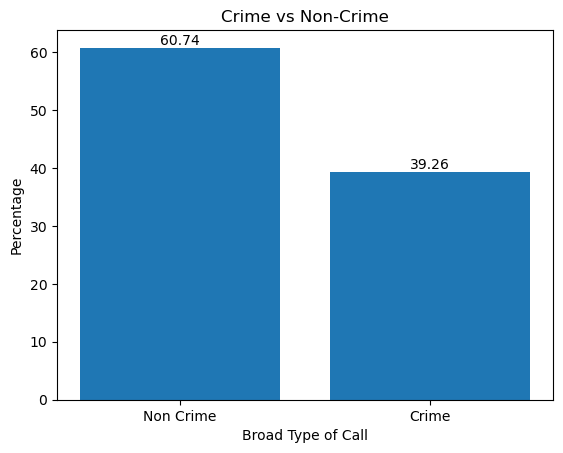

In [94]:
df_plot_data = round(nypd_calls_df['Type'].value_counts(normalize = True)*100,2)
fig, ax = plt.subplots()
bars = ax.bar(df_plot_data.index, df_plot_data.values)
ax.bar_label(bars)
plt.xlabel('Broad Type of Call')
plt.ylabel('Percentage')
plt.title('Crime vs Non-Crime')
plt.show()

In [74]:
crime_calls_df = nypd_calls_df[nypd_calls_df["Main Type"].isin(crime_types_to_filter)]

In [75]:
crime_calls_df.shape

(14893967, 21)

In [76]:
# Percentage of Data after shortlisting for the crime activites alone

In [77]:
round(100*crime_calls_df.shape[0]/nypd_calls_df.shape[0],2)

39.26

#### Plot - Main Type (After filtering for crime)

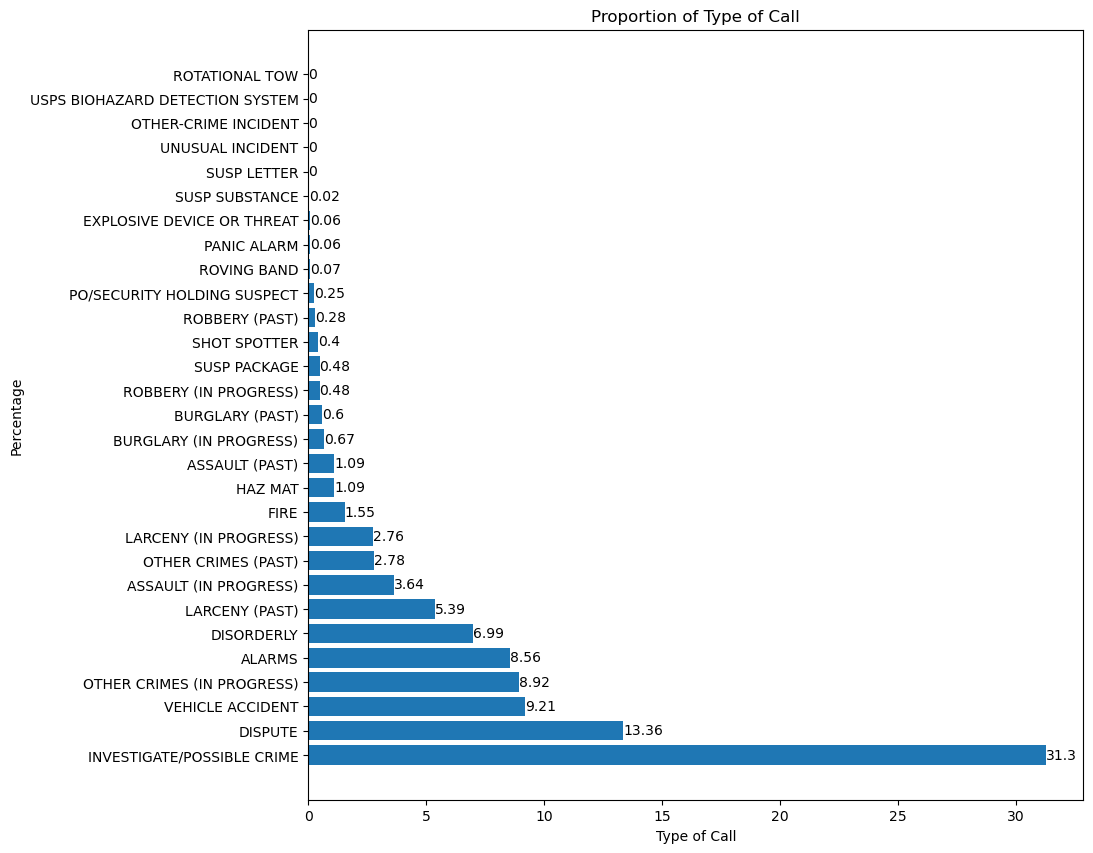

In [82]:
df_plot_data = round(crime_calls_df['Main Type'].value_counts(normalize = True)*100,2)
fig, ax = plt.subplots(figsize=(10, 10))
bars = ax.barh(df_plot_data.index, df_plot_data.values)
ax.bar_label(bars)
plt.xlabel('Type of Call')
plt.ylabel('Percentage')
plt.title('Proportion of Type of Call')
plt.show()

#### Removing one record where Borough is null

In [85]:
crime_calls_df = crime_calls_df[crime_calls_df["BORO_NM"] != '(null)']

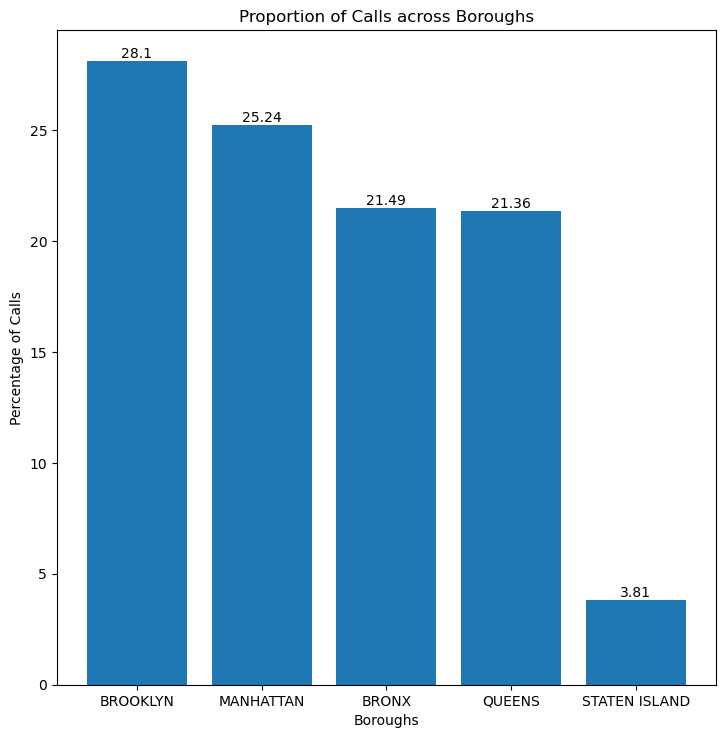

In [95]:
df_plot_data = round(crime_calls_df['BORO_NM'].value_counts(normalize = True)*100,2)
fig, ax = plt.subplots(figsize=(8.5, 8.5))
bars = ax.bar(df_plot_data.index, df_plot_data.values)
ax.bar_label(bars)
plt.xlabel('Boroughs')
plt.ylabel('Percentage of Calls')
plt.title('Proportion of Calls across Boroughs')
plt.show()

#### Fixing INCIDENT TIME -  About 500k enties has 1899-12-30T00:00:00.000. Converting it to 00:00:00

In [114]:
crime_calls_df[crime_calls_df["INCIDENT_TIME"].str.contains("00:00:00.000")]

,CAD_EVNT_ID,CREATE_DATE,INCIDENT_DATE,INCIDENT_TIME,NYPD_PCT_CD,BORO_NM,PATRL_BORO_NM,GEO_CD_X,GEO_CD_Y,RADIO_CODE,...,ADD_TS,DISP_TS,ARRIVD_TS,CLOSNG_TS,Latitude,Longitude,Main Type,Sub Type,Call Main Type,Type
17707,64842791,01/01/2020,01/01/2020,1899-12-30T00:00:00.000,47.0,BRONX,PATROL BORO BRONX,1031148,263261,50P9,...,01/01/2020 03:34:40 AM,01/01/2020 03:35:17 AM,01/01/2020 03:49:54 AM,01/01/2020 04:43:43 AM,40.889148,-73.830385,DISORDERLY,PERSON/TRANSIT,DISORDERLY,Crime
17708,64844257,01/01/2020,01/01/2020,1899-12-30T00:00:00.000,90.0,BROOKLYN,PATROL BORO BKLYN NORTH,1000829,195754,10Y3,...,01/01/2020 04:37:41 AM,01/01/2020 04:39:35 AM,NaN,01/01/2020 06:11:28 AM,40.703969,-73.940207,INVESTIGATE/POSSIBLE CRIME,SERIOUS/OTHER,INVESTIGATE/POSSIBLE CRIME,Crime
17712,64842761,01/01/2020,01/01/2020,1899-12-30T00:00:00.000,44.0,BRONX,PATROL BORO BRONX,1008647,242367,22Q1,...,01/01/2020 03:33:02 AM,01/01/2020 03:33:54 AM,01/01/2020 04:25:40 AM,01/01/2020 04:32:45 AM,40.831891,-73.911840,LARCENY (PAST),OTHER/INSIDE,LARCENY (PAST),Crime
17713,64844049,01/01/2020,01/01/2020,1899-12-30T00:00:00.000,43.0,BRONX,PATROL BORO BRONX,1020945,242505,10H1,...,01/01/2020 04:28:48 AM,01/01/2020 04:36:28 AM,01/01/2020 04:40:17 AM,01/01/2020 04:40:35 AM,40.832228,-73.867400,INVESTIGATE/POSSIBLE CRIME,CALLS FOR HELP/INSIDE,INVESTIGATE/POSSIBLE CRIME,Crime
17714,64838622,01/01/2020,01/01/2020,1899-12-30T00:00:00.000,52.0,BRONX,PATROL BORO BRONX,1018738,257799,10H1,...,01/01/2020 01:08:35 AM,01/01/2020 01:09:34 AM,01/01/2020 01:14:19 AM,01/01/2020 01:43:44 AM,40.874214,-73.875296,INVESTIGATE/POSSIBLE CRIME,CALLS FOR HELP/INSIDE,INVESTIGATE/POSSIBLE CRIME,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34241872,73970022,12/31/2020,12/31/2020,1899-12-30T00:00:00.000,79.0,BROOKLYN,PATROL BORO BKLYN NORTH,995302,190524,52D6,...,12/31/2020 08:09:11 PM,12/31/2020 08:28:09 PM,12/31/2020 08:28:11 PM,12/31/2020 09:15:18 PM,40.689622,-73.960149,DISPUTE,FAMILY,DISPUTE,Crime
34241876,73969983,12/31/2020,12/31/2020,1899-12-30T00:00:00.000,13.0,MANHATTAN,PATROL BORO MAN SOUTH,990769,208776,29H1,...,12/31/2020 08:06:38 PM,12/31/2020 08:08:15 PM,NaN,12/31/2020 08:08:21 PM,40.739724,-73.976477,OTHER CRIMES (PAST),HARASSMENT/INSIDE,OTHER CRIMES (PAST),Crime
34241877,73970017,12/31/2020,12/31/2020,1899-12-30T00:00:00.000,112.0,QUEENS,PATROL BORO QUEENS NORTH,1027701,198699,52D6,...,12/31/2020 08:08:56 PM,12/31/2020 08:10:27 PM,12/31/2020 08:21:25 PM,12/31/2020 09:17:02 PM,40.711961,-73.843269,DISPUTE,FAMILY,DISPUTE,Crime
34241878,73969992,12/31/2020,12/31/2020,1899-12-30T00:00:00.000,47.0,BRONX,PATROL BORO BRONX,1021102,260249,22Q2,...,12/31/2020 08:07:07 PM,12/31/2020 08:17:30 PM,12/31/2020 10:44:19 PM,12/31/2020 11:32:16 PM,40.880929,-73.866735,LARCENY (PAST),OTHER/OUTSIDE,LARCENY (PAST),Crime


In [115]:
crime_calls_df["INCIDENT_TIME"] = crime_calls_df["INCIDENT_TIME"].str.replace("1899-12-30T00:00:00.000", "00:00:00")

In [117]:
crime_calls_df["INCIDENT_TS"] = pd.to_datetime(crime_calls_df["INCIDENT_DATE"] + " " +  crime_calls_df["INCIDENT_TIME"])

In [118]:
# Removing duplicate column added during the join
del crime_calls_df["Call Main Type"]

In [149]:
crime_calls_df = crime_calls_df[crime_calls_df["INCIDENT_TS"]>="2019-01-01 00:00:00"]

#### Across Time plot on Incident Date - Month and Year

In [150]:
crime_calls_monthly_analysis = crime_calls_df.groupby(pd.Grouper(key='INCIDENT_TS', freq='ME')).size().reset_index(name='count')

In [203]:
crime_calls_monthly_analysis["Year_Month"] = crime_calls_monthly_analysis["INCIDENT_TS"].dt.year.map(str) + "_" + crime_calls_monthly_analysis["INCIDENT_TS"].dt.month.map(str)
crime_calls_monthly_analysis["Month"] = crime_calls_monthly_analysis["INCIDENT_TS"].dt.month

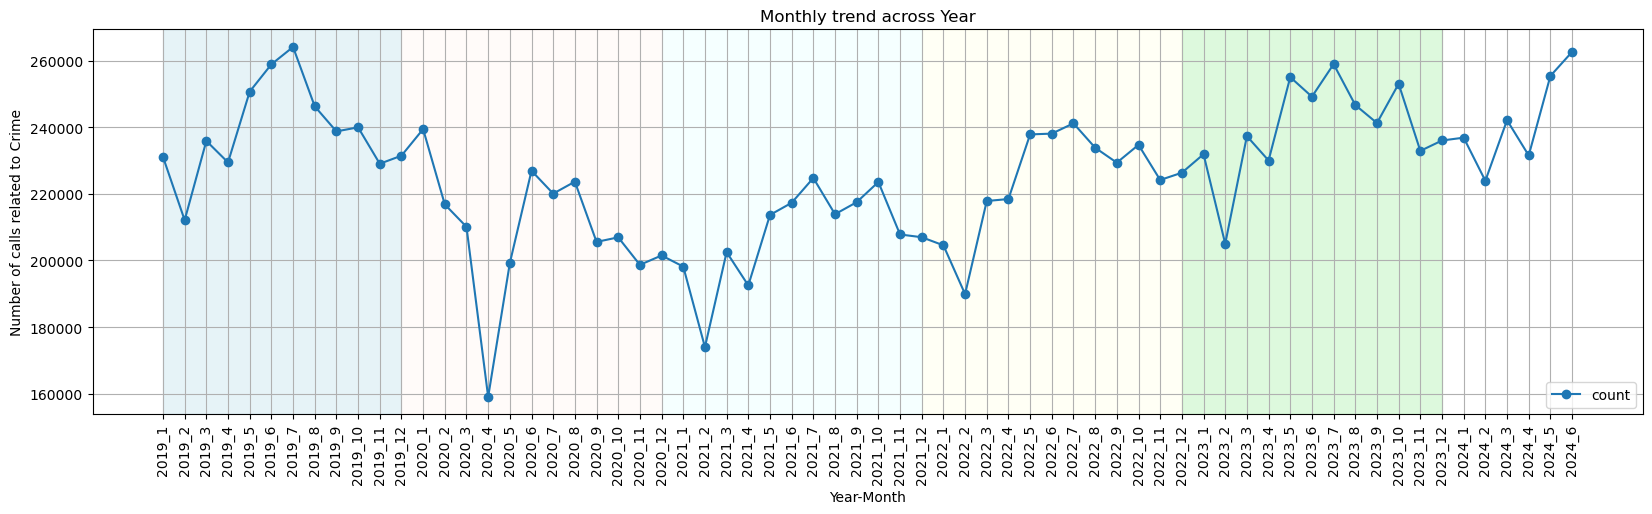

In [245]:
ax = crime_calls_monthly_analysis.plot(x='Year_Month', y='count', kind='line', marker='o', figsize=(20,5), xticks = range(0, len(crime_calls_monthly_analysis)))
ax.axvspan(0, 11, color='lightblue', alpha=0.3)
ax.axvspan(11, 23, color='seashell', alpha=0.3)
ax.axvspan(23, 35, color='lightcyan', alpha=0.3)
ax.axvspan(35, 47, color='lightyellow', alpha=0.3)
ax.axvspan(47, 59, color='lightgreen', alpha=0.3)
plt.title('Monthly trend across Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of calls related to Crime')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

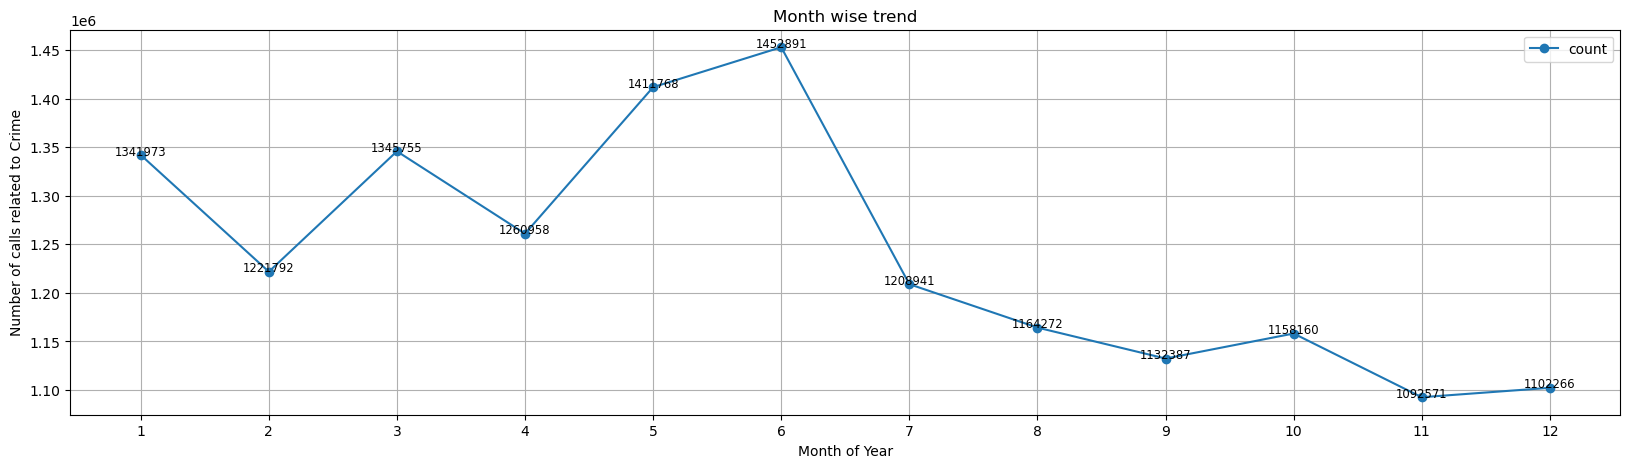

In [248]:
month_wise_trend = crime_calls_monthly_analysis.groupby("Month").sum("count").reset_index()
ax = month_wise_trend.plot(x='Month', y='count', kind='line', marker='o', figsize=(20,5), xticks = range(1, len(month_wise_trend)+1))
plt.title('Month wise trend')
plt.xlabel('Month of Year')
plt.ylabel('Number of calls related to Crime')
for x, y in zip(range(1, len(month_wise_trend)+1), month_wise_trend['count']):
    plt.text(x, y, f'{y}', ha='center', size = 'small', rotation = "horizontal")
plt.grid(True)
plt.show()

In [154]:
crime_calls_yearly_analysis = crime_calls_df.groupby(pd.Grouper(key='INCIDENT_TS', freq='YE')).size().reset_index(name='count')

In [176]:
crime_calls_yearly_analysis["Year"] =  crime_calls_yearly_analysis["INCIDENT_TS"].dt.year.map(str)

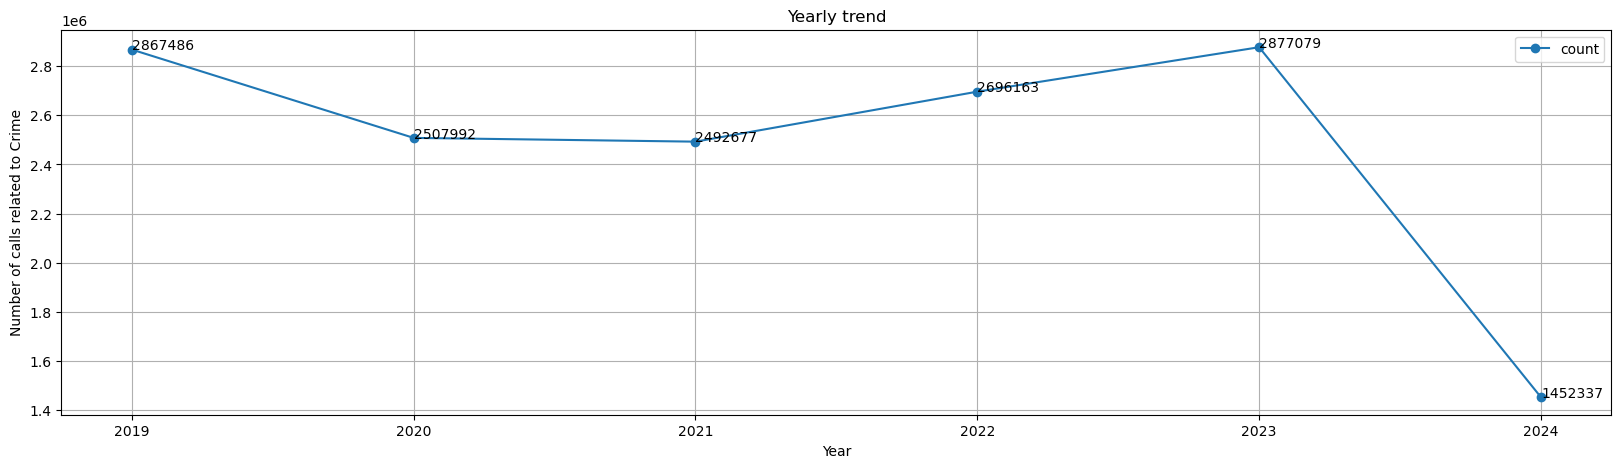

In [201]:
ax = crime_calls_yearly_analysis.plot(x='Year', y='count', kind='line', marker='o', figsize=(20,5))
plt.title('Yearly trend')
plt.xlabel('Year')
plt.ylabel('Number of calls related to Crime')
for x, y in zip(range(len(crime_calls_yearly_analysis)), crime_calls_yearly_analysis['count']):
    plt.text(x, y, f'{y}', ha='left', size = 'medium', rotation = "horizontal")
plt.grid(True)
plt.show()